In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("car_prices.csv")
df.head(3)

,car_id,mileage,selling_price
0,A001,126958,9734
1,A002,151867,8775
2,A003,136932,3928


Matplotlib is building the font cache; this may take a moment.


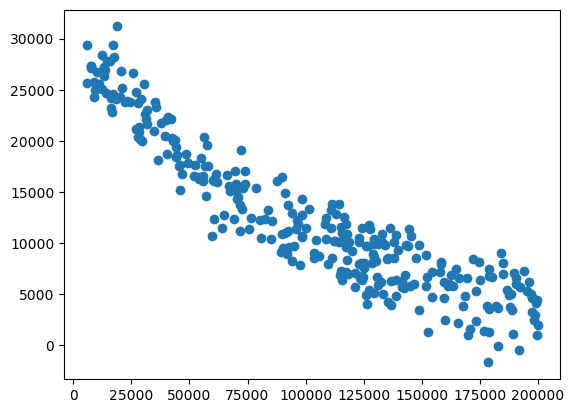

In [3]:
from matplotlib import pyplot as plt 
plt.figure(figure=(8,6))
plt.scatter(df.mileage,df.selling_price)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
X = df[['mileage']]
y = df['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 5)

In [10]:
X.shape, X_test.shape

((300, 1), (60, 1))

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly.fit_transform(np.array([[1],[2],[3],[4]]))

array([[ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.]])

In [16]:
poly = PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [14]:
X_train[:5]

,mileage
102,44504
108,43660
96,125151
294,64040
11,131324


In [17]:
X_train_poly[:5]

array([[1.00000000e+00, 4.45040000e+04, 1.98060602e+09],
       [1.00000000e+00, 4.36600000e+04, 1.90619560e+09],
       [1.00000000e+00, 1.25151000e+05, 1.56627728e+10],
       [1.00000000e+00, 6.40400000e+04, 4.10112160e+09],
       [1.00000000e+00, 1.31324000e+05, 1.72459930e+10]])

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mse,r2

(np.float64(3942449.0428202143), 0.916145076991595)

In [27]:
X_range = np.linspace(X['mileage'].min(),X['mileage'].max(),300).reshape(-1,1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)

/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

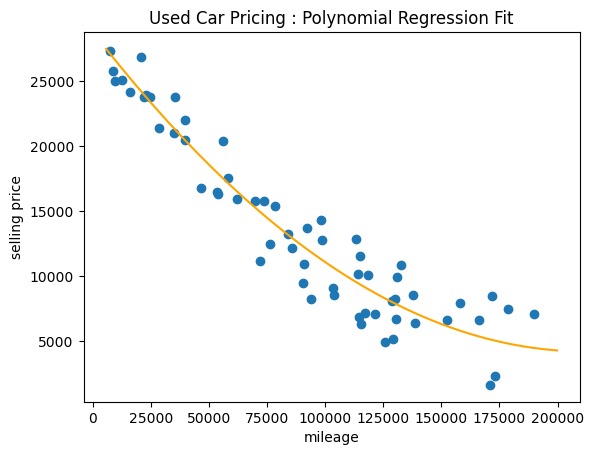

In [34]:
plt.scatter(X_test['mileage'],y_test,label='Actual Data')
plt.plot(X_range, y_range_pred, color='orange', label = 'Polynomial Regression Line')
plt.title('Used Car Pricing : Polynomial Regression Fit')
plt.xlabel('mileage')
plt.ylabel('selling price')
plt.legend
plt.show